In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings("ignore")

data = pd.read_csv("M:/DataSet/usaccident/real/cleanData1.csv",index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212697 entries, 0 to 212696
Data columns (total 40 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   TMC                212697 non-null  int64  
 1   Severity           212697 non-null  int64  
 2   Start_Lat          212697 non-null  float64
 3   Start_Lng          212697 non-null  float64
 4   Distance(mi)       212697 non-null  float64
 5   Side               212697 non-null  int64  
 6   Temperature(F)     212697 non-null  float64
 7   Wind_Chill(F)      212697 non-null  float64
 8   Humidity(%)        212697 non-null  float64
 9   Pressure(in)       212697 non-null  float64
 10  Visibility(mi)     212697 non-null  float64
 11  Wind_Speed(mph)    212697 non-null  float64
 12  Precipitation(in)  212697 non-null  float64
 13  Amenity            212697 non-null  int64  
 14  Bump               212697 non-null  int64  
 15  Crossing           212697 non-null  int64  
 16  Gi

<AxesSubplot:>

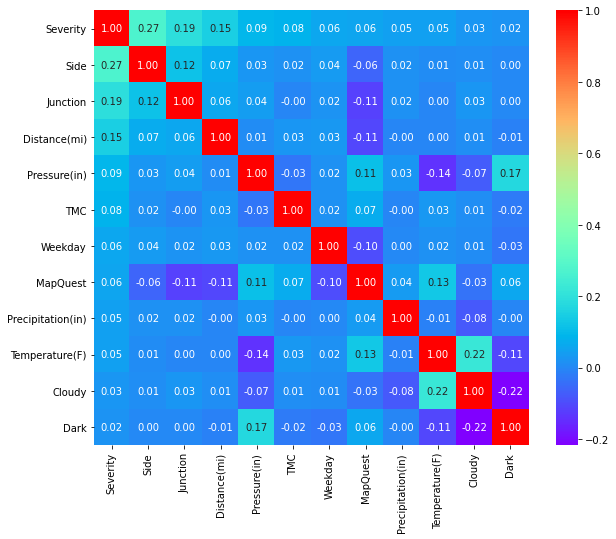

In [2]:
corrmat = data.corr()
plt.subplots(figsize=(10,8))
k = 12
cols = corrmat.nlargest(k,'Severity')['Severity'].index
cm = np.corrcoef(data[cols].values.T)
sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f'
           ,annot_kws={"size":10},yticklabels=cols.values
           ,xticklabels=cols.values,cmap="rainbow")

2.数据集划分
=

In [3]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import RobustScaler

Y = data['Severity']
X = data.drop(["Severity"], axis=1)

X.shape, Y.shape

((212697, 39), (212697,))

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10, stratify=Y)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((170157, 39), (42540, 39), (170157,), (42540,))

3.特征选择
=

In [5]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier()
clf = clf.fit(X_train,Y_train)
np.count_nonzero(clf.feature_importances_)

39

In [7]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf = clf.fit(X_train,Y_train)
np.count_nonzero(clf.feature_importances_)

39

In [6]:
data.to_csv("M:/DataSet/usaccident/real/selectData1.csv")